In [93]:
import utils
import re
from collections import defaultdict
from itertools import permutations

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Day 9 All in a Single Night

https://adventofcode.com/2015/day/9

Every year, Santa manages to deliver all of his presents in a single night.

This year, however, he has some new locations to visit; his elves have provided him the distances between every pair of locations. He can start and end at any two (different) locations he wants, but he must visit each location exactly once. What is the shortest distance he can travel to achieve this?

For example, given the following distances:

```
London to Dublin = 464
London to Belfast = 518
Dublin to Belfast = 141
```

The possible routes are therefore:

```
Dublin -> London -> Belfast = 982
London -> Dublin -> Belfast = 605
London -> Belfast -> Dublin = 659
Dublin -> Belfast -> London = 659
Belfast -> Dublin -> London = 605
Belfast -> London -> Dublin = 982
```

The shortest of these is `London -> Dublin -> Belfast = 605`, and so the answer is `605` in this example.

What is the distance of the shortest route?

---

This looks like a graph problem! It could be brute forced as well, but more elegant to do as a graph. First up a function to make graphs from our text input:

In [160]:
def make_graph(data):
    """takes in a string of data, returns node and edge weights"""
    graph = defaultdict(set)
    weights = {}

    for s in [s.split(" = ") for s in data]:
        city1, city2 = s[0].split(" to ")
        weight = int(s[1])

        graph[city1].update([city2])
        graph[city2].update([city1])

        weights[(city1, city2)] = weight
        weights[(city2, city1)] = weight
    
    return graph, weights

test = """
London to Dublin = 464
London to Belfast = 518
Dublin to Belfast = 141""".strip().splitlines()
    
graph, weights = make_graph(test)
graph, weights

(defaultdict(set,
             {'London': {'Belfast', 'Dublin'},
              'Dublin': {'Belfast', 'London'},
              'Belfast': {'Dublin', 'London'}}),
 {('London', 'Dublin'): 464,
  ('Dublin', 'London'): 464,
  ('London', 'Belfast'): 518,
  ('Belfast', 'London'): 518,
  ('Dublin', 'Belfast'): 141,
  ('Belfast', 'Dublin'): 141})

Now here I'm just brute calculating all the possible path lengths - this isn't ideal as I'm calculating more paths than I need to:

In [161]:
paths = [i for i in permutations(list(graph.keys()))]
path_lengths = []

for p in paths:
    cost = 0
    for i, city in enumerate(p):
        if i < len(p)-1:
            cost += weights[(city, p[i+1])]
    path_lengths.append(cost)
    
min(path_lengths), max(path_lengths)

(605, 982)

`605` is the shortest route for the test data, so moving on... and while I'm at at, lets take a look at the graph:

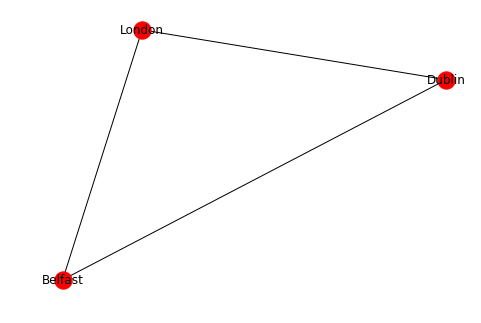

In [148]:
G = nx.Graph()
G.add_nodes_from(graph)
G.add_weighted_edges_from([list(key + (val,)) for key, val in w.items()])
nx.draw(G, with_labels=True)

Now on to out actual graph:

In [170]:
data = utils.get_input(9)
data = data.splitlines()
data[:4]

['AlphaCentauri to Snowdin = 66',
 'AlphaCentauri to Tambi = 28',
 'AlphaCentauri to Faerun = 60',
 'AlphaCentauri to Norrath = 34']

In [171]:
graph, weights = make_graph(data)

paths = [i for i in permutations(list(graph.keys()))]

path_lengths = []

for p in paths:
    cost = 0
    for i, city in enumerate(p):
        if i < len(p)-1:
            cost += weights[(city, p[i+1])]
    path_lengths.append(cost)
    
min(path_lengths), max(path_lengths)

(141, 736)

so we can see the shortest and longest path, which answers part 1 and 2 all in one !
lets see the graph itself:

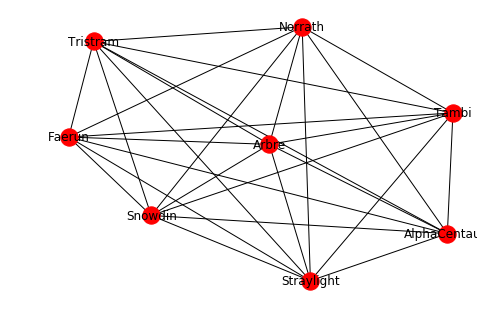

In [172]:
G = nx.Graph()
G.add_nodes_from(graph)
G.add_weighted_edges_from([list(key + (val,)) for key, val in weights.items()])
nx.draw(G, with_labels=True)